# watershed_demo

=====

## Description
Demo program of watershed algorithm.

## References
- https://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html

In [1]:
# ===== Setup =====
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
output_dir = 'output/'
file_name = 'sample.png'
kernel_size = 3
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

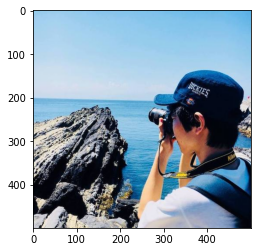

In [2]:
# ===== Load Image =====
raw_image = cv2.imread(file_name)
raw_plt = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

plt.imshow(raw_plt)
plt.show()
plt.imsave(output_dir + 'raw_image.png', raw_plt)

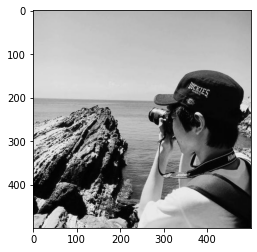

In [3]:
# ===== Read Gray and Threshold=====
gray = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
gray_plt = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(gray_plt)
plt.show()
plt.imsave(output_dir + 'gray_plt.png', gray_plt)

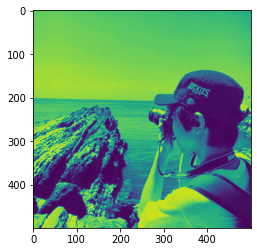

In [4]:
# ===== Read Gray and Threshold=====
plt.imshow(gray)
plt.show()
plt.imsave(output_dir + 'gray.png', gray)

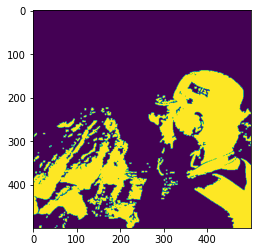

In [5]:
# ===== Noise Removal =====
kernel = np.ones((kernel_size,kernel_size),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

plt.imshow(opening)
plt.show()
plt.imsave(output_dir + 'opening.png', opening)

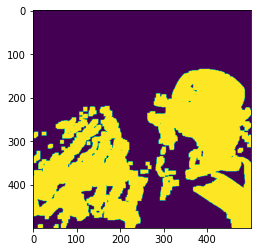

In [6]:
# ===== Get Sure Background Area =====
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg)
plt.show()
plt.imsave(output_dir + 'sure_bg.png', sure_bg)

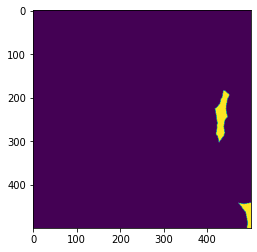

In [7]:
# ===== Finding Sure Foreground Area =====
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

plt.imshow(sure_fg)
plt.show()
plt.imsave(output_dir + 'sure_fg.png', sure_fg)

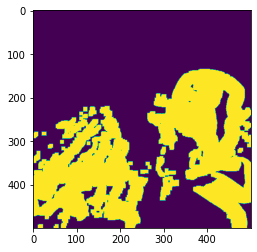

In [8]:
# ===== Finding unknown region =====
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)
plt.show()
plt.imsave(output_dir + 'unknown.png', unknown)

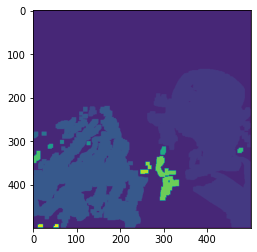

In [9]:
# ===== Marker labelling =====
ret, markers = cv2.connectedComponents(sure_bg)
markers = markers+1
# markers[unknown==255] = 0
markers = cv2.watershed(raw_image,markers)

plt.imshow(markers)
plt.show()
plt.imsave(output_dir + 'markers.png', markers)

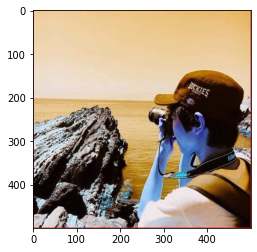

In [10]:
raw_image[markers == -1] = [255,0,0]
plt.imshow(raw_image)
plt.show()
plt.imsave(output_dir + 'raw_image_marked.png', raw_image)